# Universidade Federal do Rio Grande do Norte
## Programa de Pós-graduação em Engenharia Elétrica e de Computação
### Disciplina: Tópicos Especiais C
Aluno: Aguinaldo Bezerra Batista Júnior
Professor: Luiz Affonso

### Trabalho de Conclusão

Tema: Análise de Dataset utilizando Matriz de Correlação/Variância e PCA

Objetivos:
- Obter dados;
- Preparar dados para análise;
- Realizar análise PCA.
 
Dataset escolhido: "World Happiness Report 2016" obtido de http://worldhappiness.report/ed/2016/


## Descrição do Dataset:

The World Happiness Report é uma pesquisa do estado global de felicidade. O primeiro relatório foi publicado em 2012, o segundo em 2013 e o terceiro em 2015. A versão de 2016, que classifica 156 países por seus níveis de felicidade, foi lançado em Roma em 20/03/2016. O relatório avalia o estado da felicidade no mundo com base nas variações pessoais e nacionais relacionadas à felicidade e reflete uma nova demanda mundial por mais atenção à felicidade das pessoas como critério para políticas governamentais.

## Preparação do Ambiente

In [ ]:
# Preparação do Ambiente

## Definindo diretorio atual como diretorio de trabalho
setwd(system("pwd", intern = T) )

## Carregando bibliotecas básicas(algumas tem que ser instaladas via install_github() )
library(devtools) # necessario para carregar bibliotecas de terceiros. Pacote exige instalacao de varias dependencias no sistema.
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
#library(tidyr)
#suppressMessages(library(dplyr))
#library(RColorBrewer)
#library(tm)
#library(wordcloud)
#library(xtable)
#library(VIM) # vizualização de NAs
#library(mice) # completar dados ausentes
#suppressPackageStartupMessages(library(DescTools))
#suppressMessages(library(psych))
#suppressMessages(library(PerformanceAnalytics))
#suppressMessages(library(plotly))
#library(FactoMineR)
#library(corrplot)
#library(factoextra)
options(warn = -1) # Nao exibir warnings de carregamento de pacotes

## Carregando dados brutos
Carregando dataset bruto em .csv no R e definindo os países como "indivíduos" para a análise.

In [8]:
# Carregando dados brutos
happy.raw = read.csv("happy2016.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
# criando DF e nomeando indivíduos com base na coluna Country
happy = data.frame(happy.raw, row.names = happy.raw$Country, check.names = FALSE) 


In [9]:
#Mostrando dataset original
head(happy)

Country     Region         Happiness.Rank Happiness.Score
Denmark     Denmark     Western Europe 1              7.526          
Switzerland Switzerland Western Europe 2              7.509          
Iceland     Iceland     Western Europe 3              7.501          
Norway      Norway      Western Europe 4              7.498          
Finland     Finland     Western Europe 5              7.413          
Canada      Canada      North America  6              7.404          
            Lower.Confidence.Interval Upper.Confidence.Interval
Denmark     7.460                     7.592                    
Switzerland 7.428                     7.590                    
Iceland     7.333                     7.669                    
Norway      7.421                     7.575                    
Finland     7.351                     7.475                    
Canada      7.335                     7.473                    
            Economy..GDP.per.Capita. Family  Health..Life.Expectancy. Freedom
Denmark     1.44178                  1.16374 0.79504                  0.57941
Switzerland 1.52733                  1.14524 0.86303                  0.58557
Iceland     1.42666                  1.18326 0.86733                  0.56624
Norway      1.57744                  1.12690 0.79579                  0.59609
Finland     1.40598                  1.13464 0.81091                  0.57104
Canada      1.44015                  1.09610 0.82760                  0.57370
            Trust..Government.Corruption. Generosity Dystopia.Residual
Denmark     0.44453                       0.36171    2.73939          
Switzerland 0.41203                       0.28083    2.69463          
Iceland     0.14975                       0.47678    2.83137          
Norway      0.35776                       0.37895    2.66465          
Finland     0.41004                       0.25492    2.82596          
Canada      0.31329                       0.44834    2.70485

## Preparação de dados
Realizando pequenos ajustes no dataset.

In [10]:
# removendo a colunas que nao serao utilizadas
happy = subset(happy, select = -c(1,5,6)) 
#head(happy)
#renomeando colunas para nome mais "amigável"
names(happy)[4] = "Economy"
names(happy)[6] = "Life.Expectancy"
names(happy)[8] = "Gov.Trust"
names(happy)[10] = "Dystopia.Resid"
#head(happy)
# Reordenando colunas
happy = happy[,c(1,4,5,6,7,8,9,10,3,2)]

### Visualizando dataset de trabalho

In [11]:
# Visualizando dataset de trabalho
head(happy)

Region         Economy Family  Life.Expectancy Freedom Gov.Trust
Denmark     Western Europe 1.44178 1.16374 0.79504         0.57941 0.44453  
Switzerland Western Europe 1.52733 1.14524 0.86303         0.58557 0.41203  
Iceland     Western Europe 1.42666 1.18326 0.86733         0.56624 0.14975  
Norway      Western Europe 1.57744 1.12690 0.79579         0.59609 0.35776  
Finland     Western Europe 1.40598 1.13464 0.81091         0.57104 0.41004  
Canada      North America  1.44015 1.09610 0.82760         0.57370 0.31329  
            Generosity Dystopia.Resid Happiness.Score Happiness.Rank
Denmark     0.36171    2.73939        7.526           1             
Switzerland 0.28083    2.69463        7.509           2             
Iceland     0.47678    2.83137        7.501           3             
Norway      0.37895    2.66465        7.498           4             
Finland     0.25492    2.82596        7.413           5             
Canada      0.44834    2.70485        7.404           6

## Análise Exploratória do dataset

### Análise Descritiva

#### Sumário amigável do dataset com o pacote DescTools, com detalhamento estatístico do dataframe e de cada variável observada. 

In [12]:
#sumário do dataset de trabalho
library(DescTools)
Desc(happy, plotit=F)

------------------------------------------------------------------------------ 
Describe happy (data.frame):

data.frame:	157 obs. of  10 variables

  Nr  ColName          Class      NAs  Levels
  1   Region           character  .          
  2   Economy          numeric    .          
  3   Family           numeric    .          
  4   Life.Expectancy  numeric    .          
  5   Freedom          numeric    .          
  6   Gov.Trust        numeric    .          
  7   Generosity       numeric    .          
  8   Dystopia.Resid   numeric    .          
  9   Happiness.Score  numeric    .          
  10  Happiness.Rank   integer    .          


------------------------------------------------------------------------------ 
1 - Region (character)

  length      n    NAs unique levels  dupes
     157    157      0     10     10      y
         100.0%   0.0%                     

                              level  freq   perc  cumfreq  cumperc
1                Sub-Saharan Africa    

#### Boxplots da variabilidade do dataset para o score de felicidade, economia e rank de felicidade por região do planeta, usando o pacote plotly

In [1]:
## Boxplot usando plotly
library(plotly)
par(mfrow=c(3,1))
plot_ly(happy,x=~Region,
        y=~Happiness.Score,
        type="box",
        boxpoints="all",
        pointpos = -1.8,
        color=~Region)

plot_ly(happy,x=~Region,
        y=~Economy,
        type="box",
        boxpoints="all",
        pointpos = -1.8,
        color=~Region)

plot_ly(happy,x=~Region,
        y=~Happiness.Rank,
        type="box",
        boxpoints="all",
        pointpos = -1.8,
        color=~Region)

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



HTML widgets cannot be represented in plain text (need html)

Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”

HTML widgets cannot be represented in plain text (need html)

Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”

HTML widgets cannot be represented in plain text (need html)

Este tipo de visualização do dataset permite a fácil constatação da variabilidade das variáveis analisadas com relação às regiões do planeta. Mostra, por exemplo, que as primeiras posições no ranking de felicidade pertencem aos países da Europa Ocidental, Australia/Nova Zelândia e América do Norte, bem como, mostra que há pouca variabilidade entre os scores relacionados à renda per-capita (Economy) na Europa Ocidental. Mostra ainda que os países da América Latina são, de maneira geral, mais felizes do que os países da Europa Central/Oriental, Oriente Médio/Norte da África e Sudeste Asiático.

### Análise Correlacional

#### Análise preliminar e visual das distribuições e correlações entre as variáveis relevantes do dataset proporcionada pela função pairs(). Esta função constrói uma matriz de plots bivariáveis entre as variáveis repassadas.

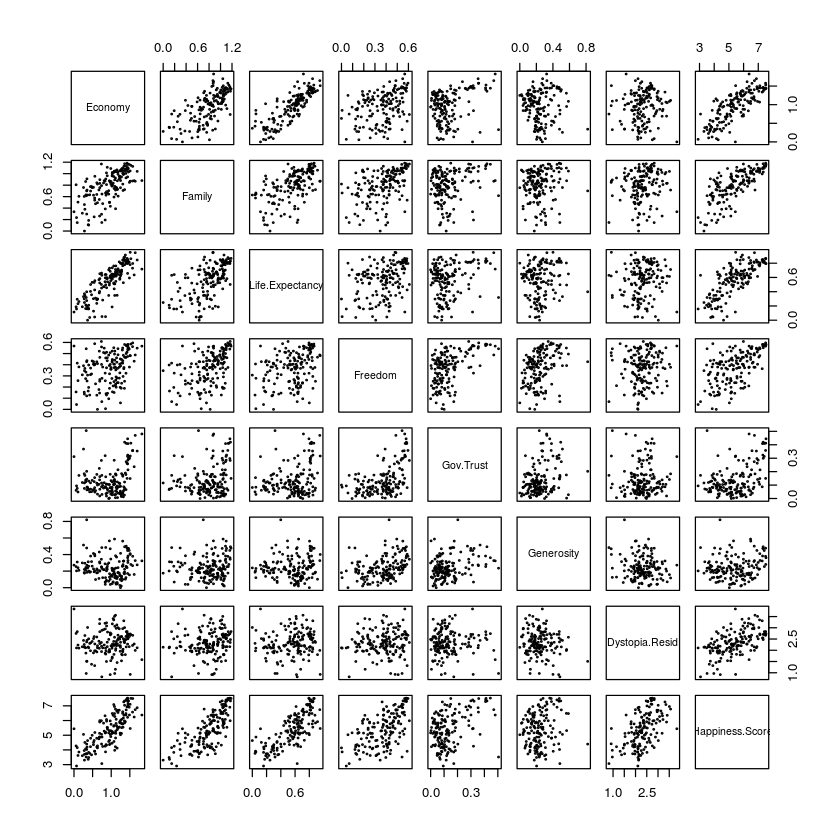

In [13]:
# Region e Happiness.Rank serão retirados da análise
# Scatterplot de todas as variáveis relevantes para ter visão geral da correlação entre as variáveis
pairs(happy[,2:9], cex=0.27)

Este scatterplot bivariável permite-nos ter uma visão geral da correlação entre as variáveis. Através deste tipo de plot, é possível notar facilmente várias variáveis do dataset são positivamente correlacionadas.

#### Gerando e visualizando a matriz de correlação com a função corr.test() do pacote psych

In [14]:
# Gerando matriz de correlacao
happy_corr = corr.test(happy[,2:9])
happy_corr$r

Economy     Family     Life.Expectancy Freedom    Gov.Trust   
Economy          1.00000000 0.66953969 0.83706723      0.36228285  0.294184775
Family           0.66953969 1.00000000 0.58837678      0.45020820  0.213560938
Life.Expectancy  0.83706723 0.58837678 1.00000000      0.34119929  0.249583285
Freedom          0.36228285 0.45020820 0.34119929      1.00000000  0.502053974
Gov.Trust        0.29418478 0.21356094 0.24958329      0.50205397  1.000000000
Generosity      -0.02553066 0.08962885 0.07598731      0.36175133  0.305929861
Dystopia.Resid   0.06862402 0.11967231 0.10085705      0.09163094 -0.002909346
Happiness.Score  0.79032202 0.73925158 0.76538433      0.56682667  0.402032245
                Generosity  Dystopia.Resid Happiness.Score
Economy         -0.02553066  0.068624025   0.7903220      
Family           0.08962885  0.119672314   0.7392516      
Life.Expectancy  0.07598731  0.100857046   0.7653843      
Freedom          0.36175133  0.091630941   0.5668267      
Gov.Trust        0.30592986 -0.002909346   0.4020322      
Generosity       1.00000000 -0.133001407   0.1568478      
Dystopia.Resid  -0.13300141  1.000000000   0.5437376      
Happiness.Score  0.15684780  0.543737614   1.0000000

#### Visualização conveniente e amigável da matriz de correlação com o pacote corrplot

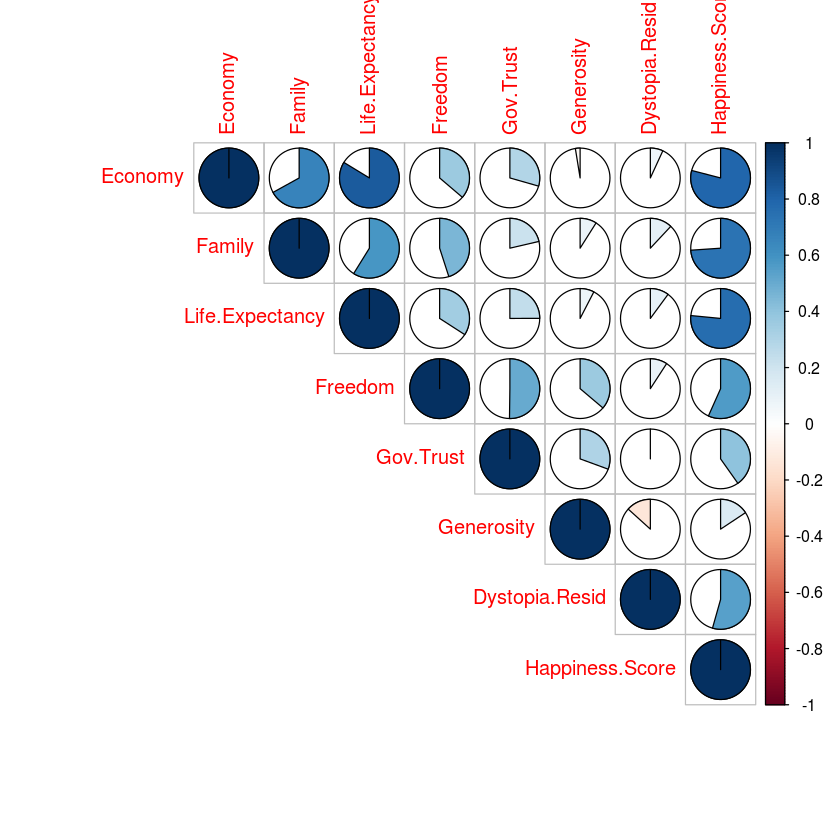

In [15]:
# Plot da análise da correlação 
library(corrplot)
corrplot(happy_corr$r, method="pie", type="upper")

Com esta visualização, é possível identificar o grau de correlação entre as váriáveis. Mostra, por exemplo, que várias variáveis são fortemente positivamente correlacionadas, como o Happiness.Score, Economy, Family e Life.Expectancy, enquanto que praticamente não há correlação entre Economy e Generosity.

#### Gráfico unindo scatterplot bivariável, histograma e valor da correlação, com uso da biblioteca PerformanceAnalytics

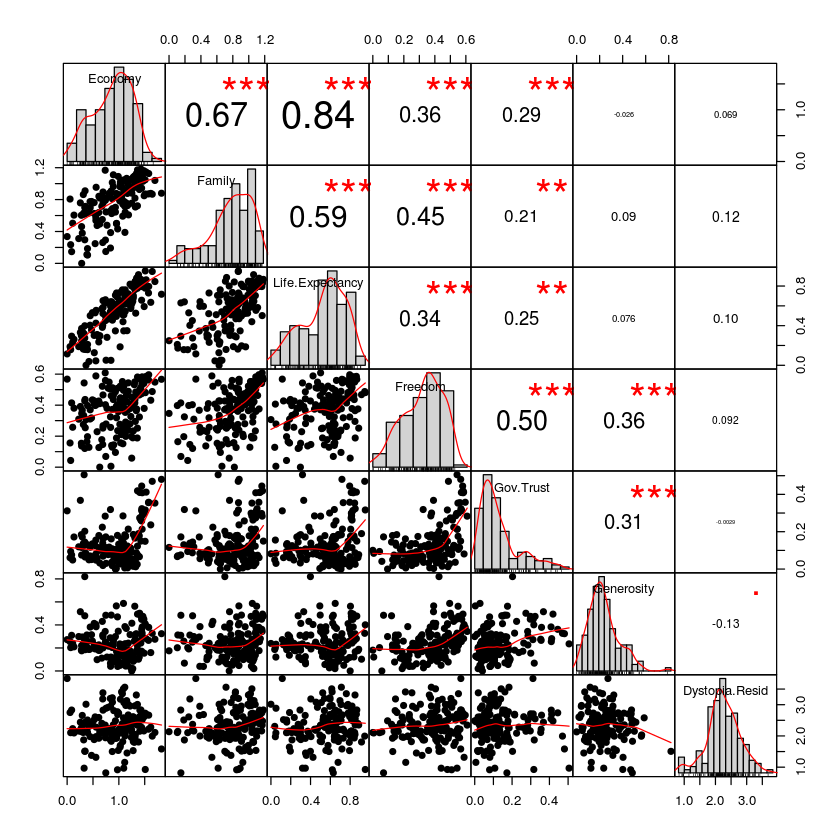

In [16]:
# Chart com o pacote PerformanceAnalytics
library(PerformanceAnalytics)
suppressWarnings(chart.Correlation(happy[,2:8], histogram=TRUE, pch=19))

O pacote PerformanceAnalytics monta um gráfico que reúne scatterplot, regressão e histograma, bem como o valor da correlação entre as variáveis e o nível de significância (como estrelas).

## Análise dos Componentes Principais (PCA)
A análise PCA é uma ferramenta que nos permite obter um visão diferenciada do dataset, a partir de um novo espaço dimensões (componentes principais), rendendo um conjunto de novos conhecimentos acerca da variabilidade do dataset.

A análise PCA será aplicada para todas as variáveis quantitativas (colunas) e indivíduos do dataset (linhas), sendo possível, ao fim da análise, visualizar semelhanças entre os indivíduos e relacionamentos lineares entre as variáveis, entre outros aspectos.

### Análise PCA com as bibliotecas FactoMineR e FactoExtra (gráficos)
Com o uso da biblioteca FactoMiner, é possível criar um objeto do tipo "PCA", que estrutura todo o resultado da análise PCA realizada sobre o dataset alvo em listas e matrizes de informações. Como as variáveis do dataset em estudo são "scores" obtidos com base em diferentes aspectos e em faixas diferentes, optou-se por normalizar as variáveis em tempo de análise, invocando o parâmetro "scale.unit = TRUE" na chamada do procedimento.

In [17]:
## Análise PCA com a biblioteca FactoMineR
library("FactoMineR")
happy_PCA = PCA(
                happy,
                #happy[,2:9], 
                scale.unit=TRUE,
                quali.sup=1, 
                quanti.sup=10, 
                axes = c(1,2), 
                graph = F) # a coluna das regiões deve ser omitida da análise
happy_PCA

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 157 individuals, described by 10 variables
*The results are available in the following objects:

   name               
1  "$eig"             
2  "$var"             
3  "$var$coord"       
4  "$var$cor"         
5  "$var$cos2"        
6  "$var$contrib"     
7  "$ind"             
8  "$ind$coord"       
9  "$ind$cos2"        
10 "$ind$contrib"     
11 "$quanti.sup"      
12 "$quanti.sup$coord"
13 "$quanti.sup$cor"  
14 "$quali.sup"       
15 "$quali.sup$coord" 
16 "$quali.sup$v.test"
17 "$call"            
18 "$call$centre"     
19 "$call$ecart.type" 
20 "$call$row.w"      
21 "$call$col.w"      
   description                                              
1  "eigenvalues"                                            
2  "results for the variables"                              
3  "coord. for the variables"                               
4  "correlations variables - dimensions"                    
5  "cos

Finda a análise PCA, é possível acessar com todos os subprodutos da análise, convenientemente estruturados no objeto "PCA".

#### Analisando autovalores e variâncias das componentes principais
Acessando happy_PCA$eig, obtém-se uma tabela que relaciona as componentes principais, seus autovalores e porcentagem da variância acumulada em cada componente.

In [19]:
# Mostrando autovalores
happy_PCA$eig

eigenvalue   percentage of variance cumulative percentage of variance
comp 1 3.791850e+00 4.739812e+01            47.39812                        
comp 2 1.454735e+00 1.818419e+01            65.58231                        
comp 3 1.061524e+00 1.326905e+01            78.85136                        
comp 4 6.707090e-01 8.383862e+00            87.23523                        
comp 5 5.244024e-01 6.555030e+00            93.79026                        
comp 6 3.560158e-01 4.450198e+00            98.24045                        
comp 7 1.407636e-01 1.759545e+00           100.00000                        
comp 8 4.454561e-08 5.568201e-07           100.00000

### Visualização da Análise PCA
A visualização das informações produzidas pela análise PCA ficará à cargo do pacote "factoextra".

#### Visualização da Variância

O montante de variação retida em cada componente está expressa em seus autovalores. O grau de importância das
componentes pode ser convenientemente vizualizado através de um gráfico de barras que relaciona as contribuições
em variância (percentagem) das componentes, chamado "scree plot", que pode ser facilmente obtido com a função fviz_screeplot do pacote factoextra:

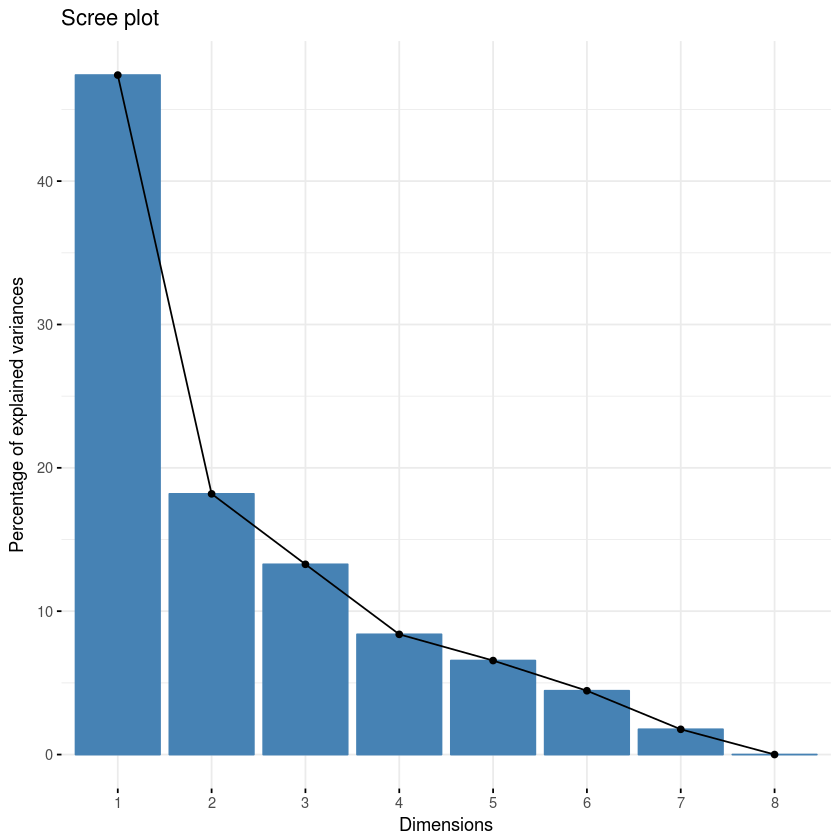

In [20]:
# Barplot das variâncias
library(factoextra)
fviz_screeplot(happy_PCA)

O gráfico mostra com bastante clareza que as duas primeiras componentes principais (dimensões) retém mais de 65% da variabilidade para o dataset em estudo (47% só na primeira componente).

#### Visualização das contribuições das variáveis e indivíduos nas 2 primeiras componentes principais

As contribuições das variáveis do dataset nas componentes podem ser acessadas e convenientemente visualizadas
ainda com ajuda da biblioteca "factoextra".

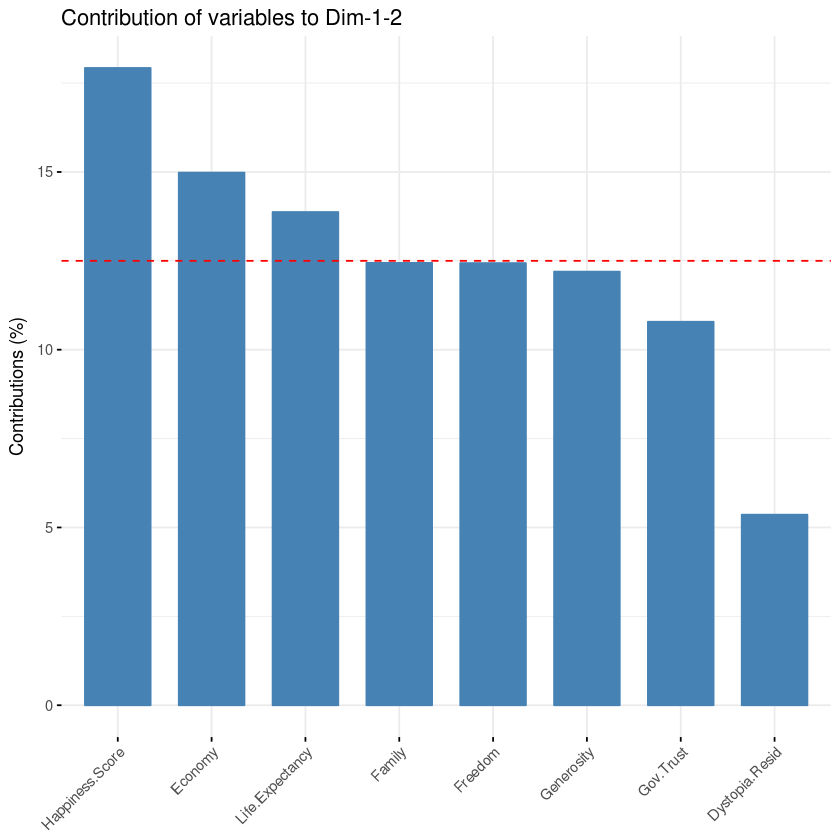

In [21]:
# Contribuições das variáveis nas primeiras componentes
fviz_pca_contrib(happy_PCA, choice = "var", axes = 1:2)

Similarmente, as contribuições (em porcentagem) dos indivídos nas componentes principais também podem ser graficamente visualizadas (50 maiores contribuições por indivíduo nas componentes 1 e 2).

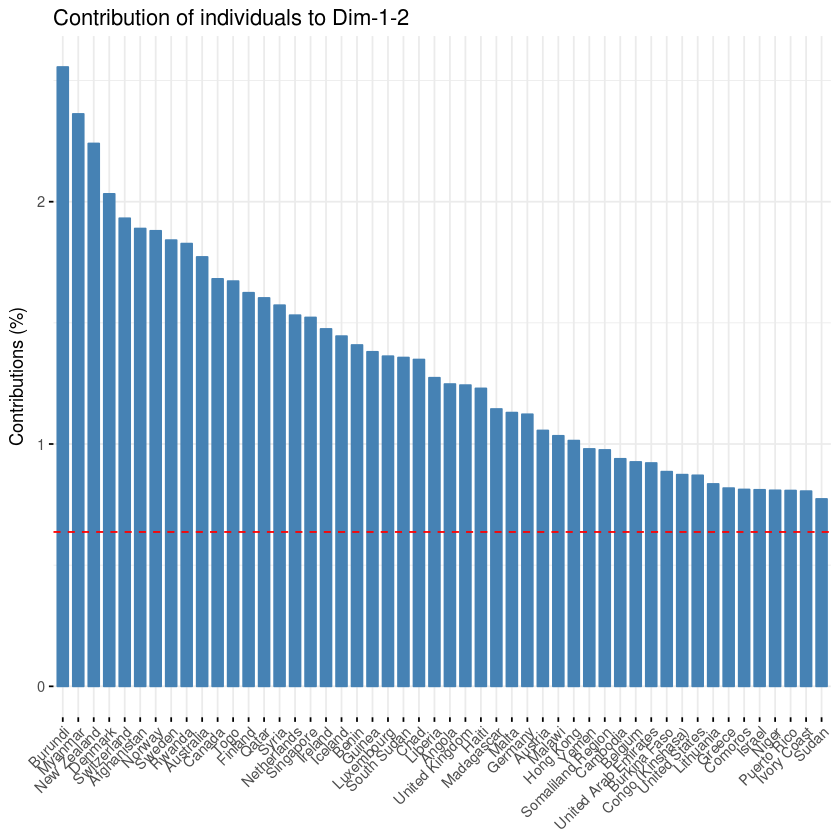

In [22]:
fviz_pca_contrib(happy_PCA, choice = "ind", axes = 1:2, top=50)
#happy_PCA$ind$contrib[1:10,]

### Mapa de Fatores
Tem grande importância na interpretação da análise PCA o gráfico chamado de "Mapa de Fatores" ou "Círculo de Correlação". Neste gráfico, é possível ter uma noção visual de vários aspectos (ao mesmo tempo) da análise PCA, como as correlações entre as variáveis e as contribuições destas variáveis nas dimensões da análise PCA (duas primeiras dimensões). Trata-se, portanto, de um plot cartesiano nas duas primeiras dimensões dos fatores cujas coordenadas estão acessíveis no objeto PCA:

In [23]:
happy_PCA$var$coord

Dim.1     Dim.2      Dim.3      Dim.4       Dim.5      
Economy         0.8546076 -0.2359043 -0.3411231 -0.06706466  0.12402508
Family          0.7975802 -0.1292297 -0.1702943  0.18821919 -0.35438523
Life.Expectancy 0.8288425 -0.2021126 -0.3007193  0.06284629  0.28100765
Freedom         0.6638259  0.4602257  0.1942757 -0.05917193 -0.43899609
Gov.Trust       0.5061513  0.5565514  0.1377272 -0.58050298  0.18918360
Generosity      0.2220728  0.7684743  0.1113533  0.52900878  0.24981693
Dystopia.Resid  0.2818863 -0.4491128  0.8398097  0.05671812  0.10087274
Happiness.Score 0.9553802 -0.1665005  0.2265729  0.05729670  0.05808794

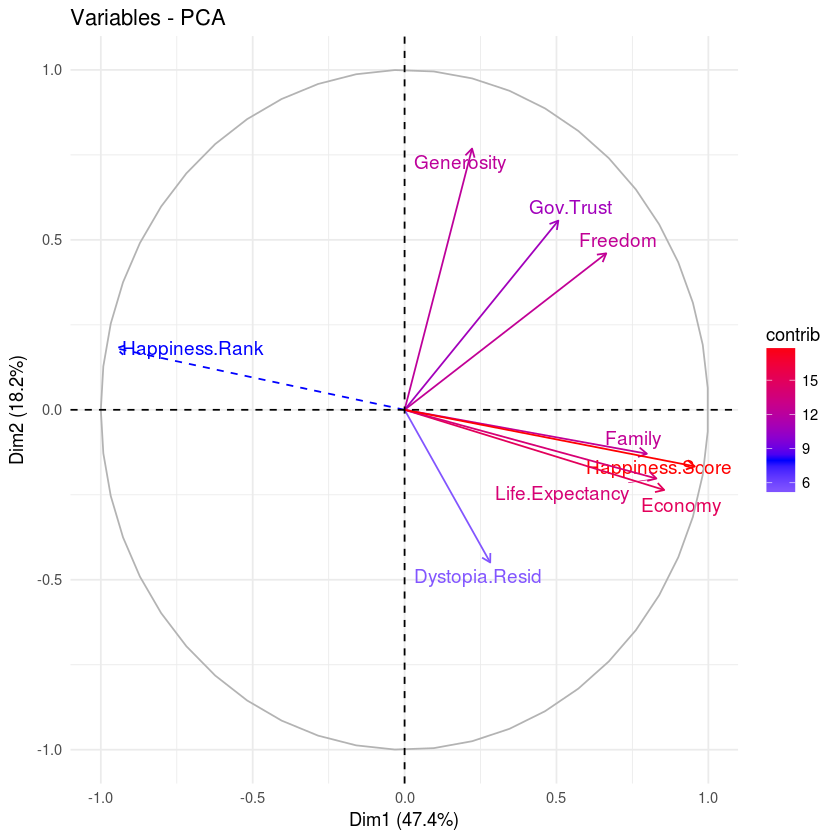

In [24]:
# Gráfico do Mapa de Fatores (váriáveis)
library(ggrepel)
fviz_pca_var(happy_PCA, col.var="contrib", repel = TRUE)+
scale_color_gradient2(low="white", mid="blue", 
                      high="red", midpoint=8)+theme_minimal()

O gráfico de mapa de fatores explicita visualmente o grau de correlacão entre as variáveis 
através do ângulo formado entre os fatores, bem como a contribuição das variáveis nas componentes (ângulo e magnitude). O gráfico ajuda a identificar as principais variáveis do dataset em termos das componentes principais. Os vetores também são coloridos de acordo com a contribuição destes nas duas componentes.


### Mapa de Indivídos
Similarmente, com o mesmo pacote de visualização, é possível plotar as coordenadas dos indivídos no plano das duas primeiras dimensões (60 indivíduos (evitando oclusões) de maior contribuição nas componentes principais).

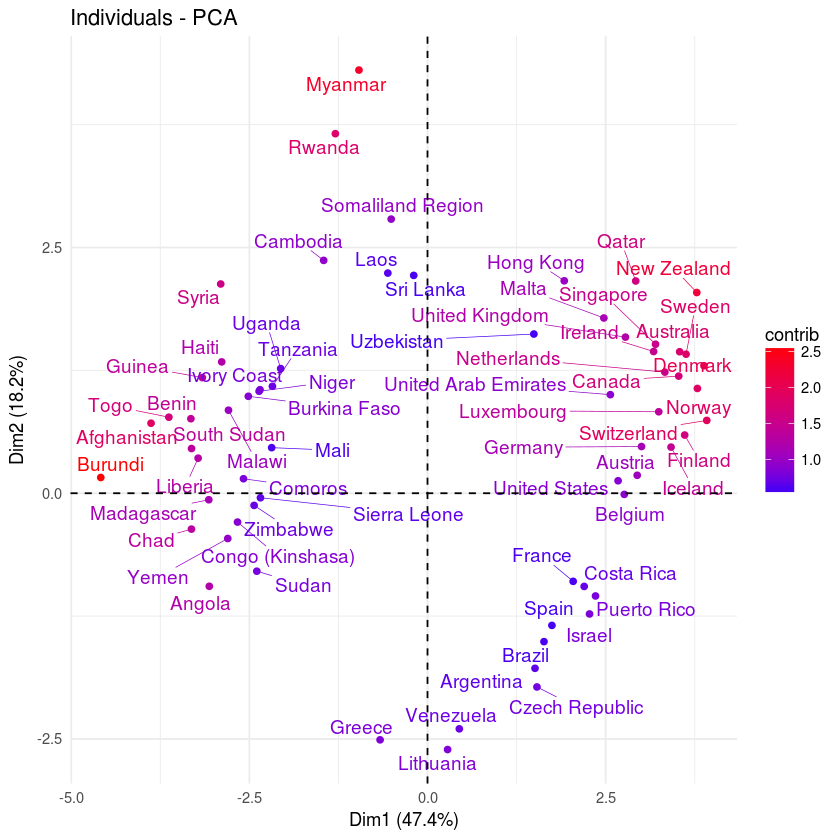

In [25]:
# Gráfico do Mapa de Fatores (indivíduos)
fviz_pca_ind(happy_PCA, repel=TRUE, select.ind = list(contrib = 65), col.ind="contrib")+
scale_color_gradient2(low="white", mid="blue", 
    high="red", midpoint=0.50) + theme_minimal()

Com o mesmo recurso, é possível, ainda, utilizar uma coluna qualitativa (happy$Region) para classificar os indivídos em grupos (vide legenda):

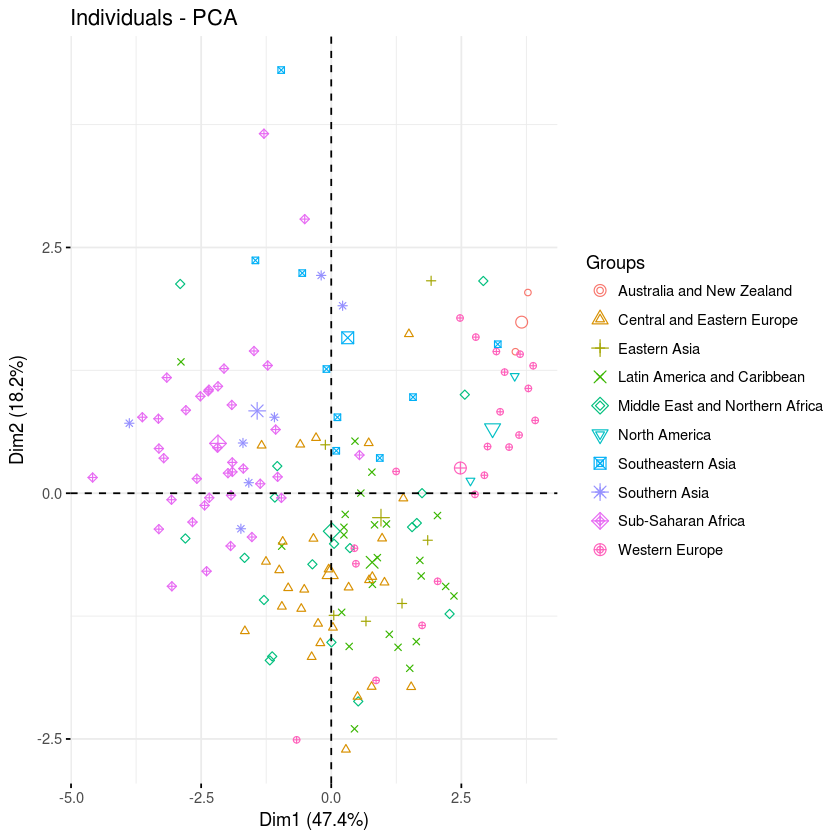

In [26]:
fviz_pca_ind(happy_PCA,
             label = "none", 
             habillage = as.factor(happy$Region), 
             #addEllipses = TRUE 
             )

Por meio destas visualizações (Mapa de Indivíduos), é possível facilmente verificar as contribuições dos indivíduos nas componentes principais, bem como identificar clusters e similaridades entre os indivíduos. É possível ver claramente que as coordenadas dos países da mesma região do planeta se aglormeram nos mesmos quadrantes, exaltando a forte relação entre a região do planeta e escores obtidos para cada variável observada.

### Biplot
Biplot é a visualização no mesmo plano e ao mesmo tempo dos fatores e dos indivíduos (limitados à 50).

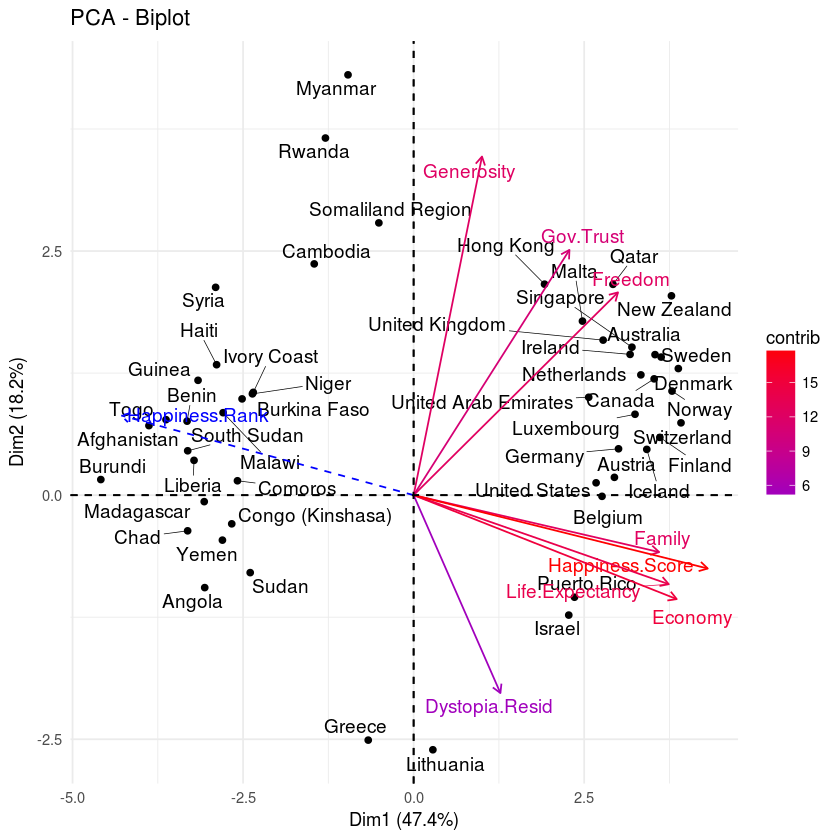

In [27]:
fviz_pca_biplot(happy_PCA,  col.var="contrib", repel = TRUE, select.ind = list(contrib = 50))+
scale_color_gradient2(low="white", mid="blue", 
    high="red", midpoint=0.50) + theme_minimal()

No biplot, é possível naturalmente identificar os indivíduos com marcações semelhantes para as variáveis observadas.

## Conclusão

O conjunto de pacotes, bibliotecas e funções utilizadas nesse estudo, possibilita, com grande facilidade, 
análises descritivas, exploratórias, correlacionais e PCA, que compreendem um bom arcabouço de ferramentas
inspesável para o melhor entendimento e extração de informação útil a partir dos dados processados.
